# Shaper Data Analysis

***
***

## TO DO LIST

- [x] Associare un errore alle misure dirette
- [x] Calcolare le stime teoriche delle quantità rilevanti
- [x] Controllare che l'apparato sperimentale risponda secondo le aspettative
- [x] Calibrare la scheda Arduino numero 7
- [x] Confronto la forma d'onda di Arduino con una simulazione Spice
- [x] Studiare la risposta in frequenza
- [x] Stimare la frequenza di taglio del circuito
- [x] Stimare la banda passante
- [x] Confronto con la simulazione Spice
- [ ] Confrontare l'undershoot con Spice
- [ ] Confronto la risposta con Rpz con Spice

## Import modules
***

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from jupyterthemes import jtplot
jtplot.reset()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import importlib
import Shaper_Analysis_Code as SA

In [3]:
importlib.reload(SA)

<module 'Shaper_Analysis_Code' from 'd:\\GitHub\\physics_laboratory_2020_2021\\CATENA ELETTRONICA\\Python\\Shaper_Analysis_Code.py'>

## Misure dirette delle componenti circuitali

***

In tabella sono riportate le misure dirette delle resistenze e della capacità utilizzate per assemblare il circuito

In [8]:
componenti = SA.misure_dirette()
componenti

,Valore,Errore,FS
R1,100.99 kΩ,0.06 kΩ,1000 kΩ
R2,99.93 kΩ,0.06 kΩ,1000 kΩ
C1,157 pF,9 pF,1000 pF
C2,159 pF,9 pF,1000 pF


## Stime Teoriche 

***

Calcolo ora le stime teoriche delle quantità più rilevanti

In [9]:
SA.get_tau_sh_th()

τ_sh_th1 =  15.86 +/- 0.91  μs
τ_sh_th2 =  15.89 +/- 0.90  μs


In [10]:
SA.get_tau_sh_mean()

τ_sh_th =  15.87 +/- 0.64  μs


In [18]:
SA.get_V_out_max()

V_max_th = 0.372 +/- 0.006  V
V_max_sper = 0.342 +/- 0.006  V
Compatibilità  λ = 3.46
Variazione percentuale: 7.96%


In [27]:
SA.get_t_sper()

τ_sper = 16.00 +/- 3.40  μs
τ_sh_th =  15.87 +/- 0.64  μs
Compatibilità  λ = 0.04
Variazione percentuale: 0.80%


## Analisi in Frequenza

***

Facciamo adesso il grafico di Bode per vedere come si comporta il filtro. Essendo composto da una parte CR e una parte RC mi aspetto un bel passa banda centrato nella frequenza di taglio!

In [173]:
# READ DATA FROM FILE
data = SA.get_data('../Data/Shaper/data_bode.txt')
data.columns = ['freq (Hz)', 'Vin (V)', 'Vout (V)', 'Vin/div', 'Vout/div']

# CALCOLO FUNZIONE DI TRASFERIMENTO ED ERRORE
data['T'] = data['Vout (V)'] / data['Vin (V)']
data['sigma T'] = SA.propagazione_T(data['T'], data['Vin (V)'], data['Vout (V)'], data['Vin/div'], data['Vout/div'])
data['sigma Tr'] = SA.propagazione_Tr(data['T'], data['Vin (V)'], data['Vout (V)'], data['Vin/div'], data['Vout/div'])

# CALCOLO I LOGARITMI PER BODE
data['log10f (dec)'] = np.log10(data['freq (Hz)'])
data['H (dB)'] = 20 * np.log10(data['T'])

# PROPAGO L'ERRORE AI LOGARITMI
data['sigma H (dB)'] = 20 * data['sigma T'] / ( data['T'] * np.log(10) )
data['sigma Hr (dB)'] = 20 * data['sigma Tr'] / ( data['T'] * np.log(10) )

data

,freq (Hz),Vin (V),Vout (V),Vin/div,Vout/div,T,sigma T,sigma Tr,log10f (dec),H (dB),sigma H (dB),sigma Hr (dB)
1,50,1.02,0.0056,0.2,0.02,0.005490,0.000794,0.000785,1.698970,-45.208243,1.256296,1.242710
2,100,1.02,0.0104,0.2,0.02,0.010196,0.000818,0.000788,2.000000,-39.831337,0.696426,0.671609
3,250,1.02,0.0248,0.2,0.02,0.024314,0.000958,0.000807,2.397940,-32.282970,0.342195,0.288353
4,500,1.02,0.0488,0.2,0.02,0.047843,0.001336,0.000869,2.698970,-26.403607,0.242624,0.157849
5,1000,1.02,0.0960,0.2,0.05,0.094118,0.002894,0.002095,3.000000,-20.526579,0.267088,0.193355
6,2000,1.02,0.1860,0.2,0.05,0.182353,0.004567,0.002427,3.301030,-14.781745,0.217518,0.115602
7,3000,1.02,0.2660,0.2,0.05,0.260784,0.006215,0.002833,3.477121,-11.674371,0.207017,0.094372
8,4000,1.02,0.3320,0.2,0.10,0.325490,0.008341,0.004679,3.602060,-9.749242,0.222582,0.124870
9,5000,1.02,0.3840,0.2,0.10,0.376471,0.009374,0.004909,3.698970,-8.485379,0.216281,0.113257
10,6000,1.02,0.4200,0.2,0.10,0.411765,0.010105,0.005080,3.778151,-7.707018,0.213153,0.107164


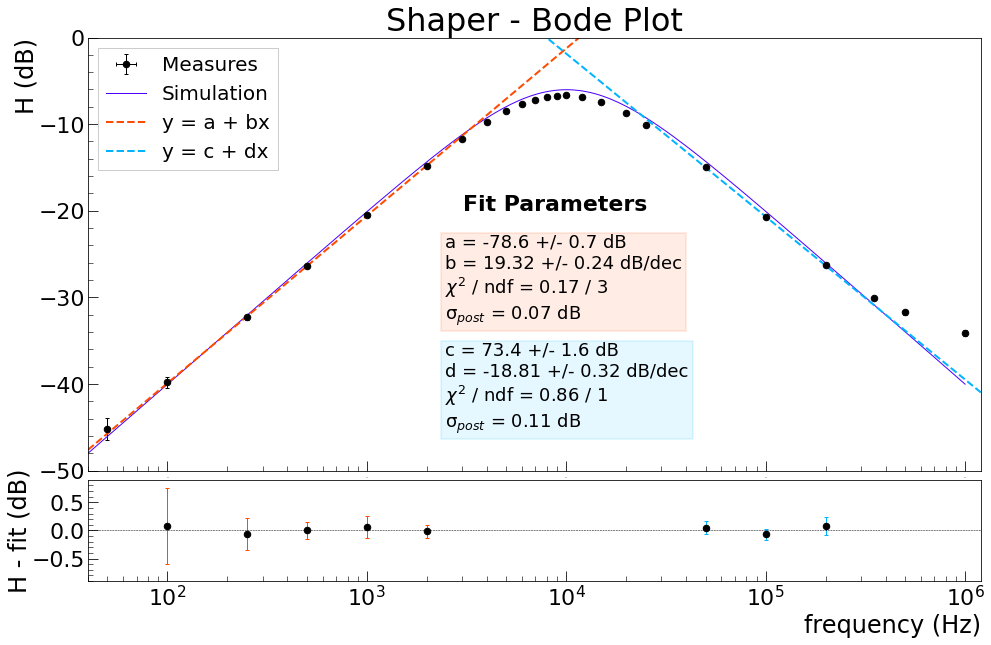

In [210]:
simulation = SA.get_bode_sim('../Simulations/Shaper/Data/Shaper_frequency.txt')
SA.bode_plot(data, simulation)

Proprio come ci aspettavamo! I fit sono pseudo decenti, non ci possiamo lamentare troppo. Ad alte frequenze troviamo un comportamento un po' anomalo... Potrebbe essere la GBW dell'operazionale? O qualche capacità parassita in parallelo al circuito? 


In [204]:
SA.get_ft_bode()
SA.get_ft_th()
SA.get_ft_comp()

ft_bode = 9.6 +/- 0.2  kHz
ft_th =  10.0 +/- 0.4  kHz
Compatibilità λ = 0.83


La frequenza di taglio stimata con Bode è ben compatibile con le aspettative teoriche! Ottimo! Vediamo ora com'è messa la banda passante: ci interessa per definire meglio le frequenze in derivazione e le frequenze in integrazione.

In [208]:
SA.get_bw()

f_low = 3.7 +/- 0.4  kHz
f_high = 26.1 +/- 0.8  kHz


Possiamo dire dunque che a frequenze inferiori di f_low si ha un comportamento derivatore, mentre a frequenze superiori ad f_high il filtro si comporta come un integratore!

## Calibrazione Arduino 7

***

In [5]:
# READ DATA FROM FILE
file_name = '../Data/Shaper/calib_arduino7.dat'

data = pd.read_csv(file_name, index_col = False, header = None, sep = ' ')
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']

SAMPLING = 955000

data['time (ms)'] = data['time'] * 1e3 * SAMPLING**-1

ADC_max = data['ADC'].max()
ADC_min = data['ADC'].min()

ADC_amplitude = ADC_max - ADC_min

b = 1 / ADC_amplitude
a = -b * ADC_min

err_b = b * SA.propagazione_cursori(0.2, 1)
err_a = ADC_min * err_b

data['V (V)'] = a + b * data['ADC']
data['err V (V)'] = np.sqrt( err_a**2 + err_b**2 )
data

,time,ADC,time (ms),V (V),err V (V)
1,1,2023,0.001047,0.996810,0.010479
2,2,2022,0.002094,0.996013,0.010479
3,3,2027,0.003141,1.000000,0.010479
4,4,2024,0.004188,0.997608,0.010479
5,5,2024,0.005236,0.997608,0.010479
...,...,...,...,...,...
2043,2043,2021,2.139267,0.995215,0.010479
2044,2044,2020,2.140314,0.994418,0.010479
2045,2045,2021,2.141361,0.995215,0.010479
2046,2046,2021,2.142408,0.995215,0.010479


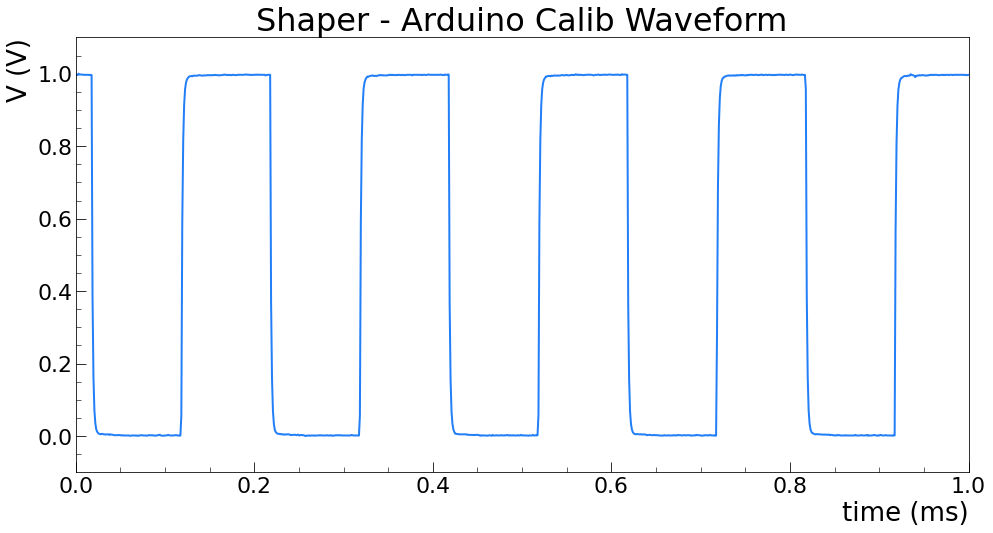

In [239]:
SA.arduino_calib_plot(data)

## Shaper Ideale - Arduino

***

Analizziamo adesso la forma d'onda del segnale in uscita dallo shaper collegato direttamente al generatore. L'onda quadra del generatore corrisponde al caso di un preamplificatore ideale!

In [177]:
# READ DATA FROM FILE
file_name = '../Data/Shaper/arduino_ideal_shaper.dat'

data = pd.read_csv(file_name, index_col = False, header = None, sep = ' ')
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']

SAMPLING = 955000

data['time (ms)'] = data['time'] * 1e3 * SAMPLING**-1 - 0.6365

# old calib
#data['V (V)'] = a + b * data['ADC']

# new calib
data['V (V)'] = a + 0.00121 * data['ADC']

data['err V (V)'] = np.sqrt( err_a**2 + err_b**2 )

data = data[(data['time (ms)'] > 0) & (data['time (ms)'] < 1.0)]
data['V (V)'] = data['V (V)'] - 0.586

data

,time,ADC,time (ms),V (V),err V (V)
608,608,995,0.000149,0.001523,0.010479
609,609,1012,0.001196,0.022093,0.010479
610,610,1044,0.002243,0.060813,0.010479
611,611,1081,0.003291,0.105583,0.010479
612,612,1114,0.004338,0.145513,0.010479
...,...,...,...,...,...
1558,1558,995,0.994914,0.001523,0.010479
1559,1559,995,0.995961,0.001523,0.010479
1560,1560,995,0.997008,0.001523,0.010479
1561,1561,995,0.998055,0.001523,0.010479


In [178]:
sim = SA.get_sim('../Simulations/Shaper/Data/Shaper_square.txt')

sim.columns = ['time (ms)', 'V (V)']

#sim['time (ms)'] = 1e3 * sim['time (ms)'] + 0.6365
sim['time (ms)'] = 1e3 * sim['time (ms)']

sim

,time (ms),V (V)
0,0.000000e+00,0.000000e+00
1,5.851429e-07,-1.777783e-09
2,1.170286e-06,8.364316e-10
3,1.755429e-06,7.842644e-09
4,2.340571e-06,1.924085e-08
...,...,...
152,2.720500e-01,-3.774970e-06
153,2.859500e-01,-3.289047e-06
154,2.998500e-01,1.213704e-07
155,2.999500e-01,1.206478e-07


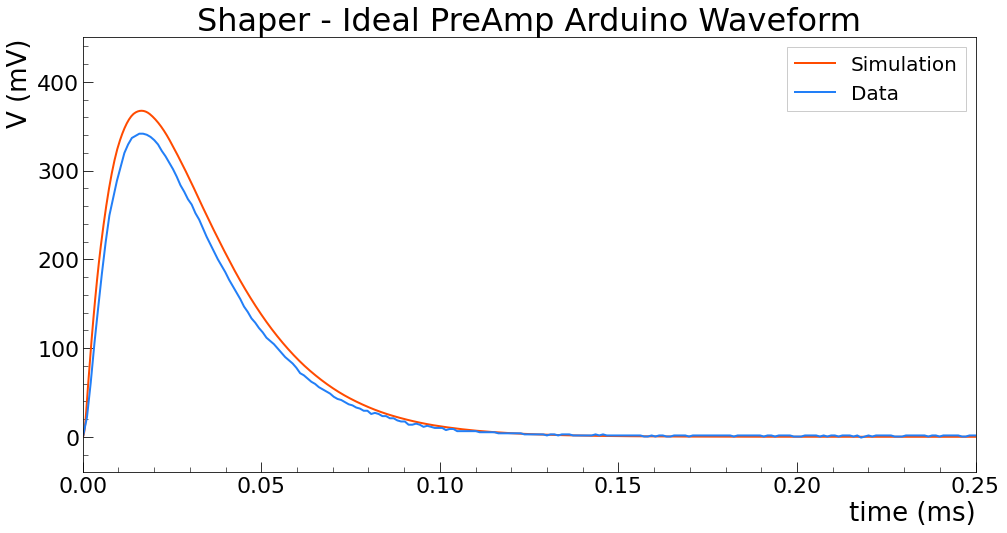

In [186]:
SA.arduino_ideal_shaper_plot(data, sim)

In [104]:
data_max = data[(data['V (V)'] == data['V (V)'].max())]
data_max.drop(axis = 'index', labels = 624, inplace = True)

tau_shaper = data_max.at[623, 'time (ms)']

print(
    '\u03C4_sh = ' + format(tau_shaper * 1e3, '.2f') + ' \u03BCs'
)

τ_sh = 15.86 μs


In [105]:
vmax = data_max.at[623, 'V (V)']
print(
    'Vmax = ' + format(vmax, '.3f') + ' V'
)

Vmax = 0.342 V


C'è qualche leggero problemino riguardo l'ampiezza del segnale dovuto all'impedenza in uscita dello shaper... però il tempo caratteristico è ottimo! Non ho ancora idee su come assegnare a tale tau un errore... 

Risolvendo il problema dell'ampiezza con una nuova calibrazione si trova che il valore del massimo è conforme al massimo sperimentale misurato con l'oscilloscopio!

## Shaper Reale - Arduino

***

Analizziamo adesso la forma d'onda del segnale in uscita dallo shaper collegato al preamplificatore. 

In [118]:
# READ DATA FROM FILE
file_name = '../Data/Shaper/arduino_preamp_shaper.dat'

data = pd.read_csv(file_name, index_col = False, header = None, sep = ' ')
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']

SAMPLING = 955000

data['time (ms)'] = data['time'] * 1e3 * SAMPLING**-1

# old calib
#data['V (V)'] = a + b * data['ADC']

# new calib
data['V (V)'] = a + 0.00121 * data['ADC']

data['err V (V)'] = np.sqrt( err_a**2 + err_b**2 )

data = data[(data['time (ms)'] < 1.0)]
#data = data[(data['time (ms)'] > 0.5) & (data['time (ms)'] < 1.0)]
data['V (V)'] = data['V (V)'] - 0.624
data['time (ms)'] = data['time (ms)'] - 0.3235

data

,time,ADC,time (ms),V (V),err V (V)
1,1,1026,-0.322453,0.001033,0.010479
2,2,1025,-0.321406,-0.000177,0.010479
3,3,1026,-0.320359,0.001033,0.010479
4,4,1026,-0.319312,0.001033,0.010479
5,5,1026,-0.318264,0.001033,0.010479
...,...,...,...,...,...
950,950,1026,0.671264,0.001033,0.010479
951,951,1025,0.672312,-0.000177,0.010479
952,952,1026,0.673359,0.001033,0.010479
953,953,1025,0.674406,-0.000177,0.010479


In [107]:
sim = SA.get_sim('../Simulations/Shaper/Data/Shaper_PreAmp_base.txt')

sim.columns = ['time (ms)', 'V (V)']

sim['time (ms)'] = 1e3 * sim['time (ms)']
sim = sim[(sim['time (ms)'] < 1.0)]

sim

,time (ms),V (V)
0,0.000000,0.000000e+00
1,0.001000,0.000000e+00
2,0.001011,-3.513050e-08
3,0.001023,-1.797891e-08
4,0.001034,5.145478e-08
...,...,...
216,0.941607,-1.300206e-04
217,0.953486,-1.203388e-04
218,0.965364,-1.113441e-04
219,0.977243,-1.030364e-04


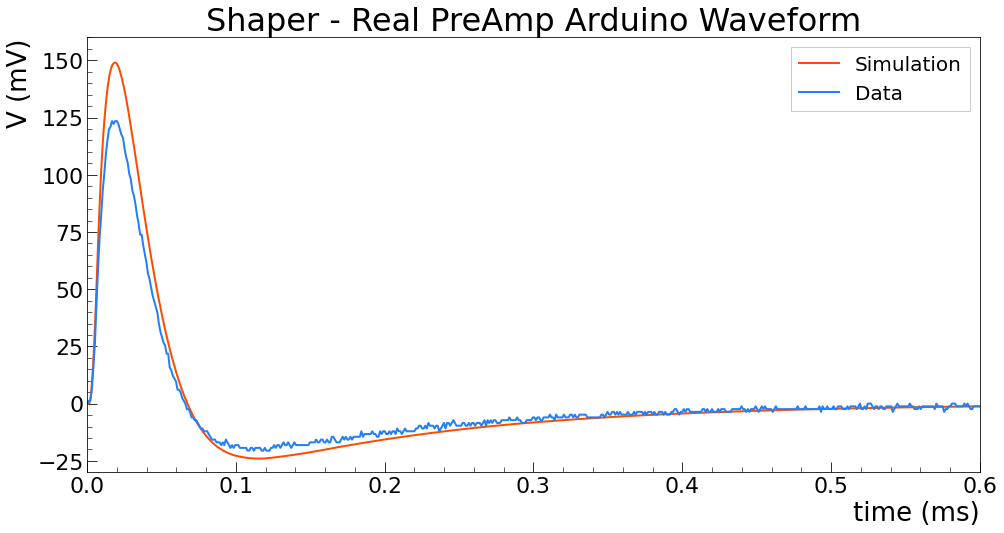

In [108]:
SA.arduino_preamp_shaper_plot(data, sim)

E' evidente la presenza dell'undershoot &rarr; lo risolviamo con la correzione di pole zero

In [119]:
data_max = data[(data['V (V)'] == data['V (V)'].max())]
data_max.drop(axis = 'index', labels = [327, 328], inplace = True)

tau_shaper = data_max.at[325, 'time (ms)']

print(
    '\u03C4_sh = ' + format(tau_shaper * 1e3, '.2f') + ' \u03BCs'
)

τ_sh = 16.81 μs


In [120]:
vmax = data_max.at[325, 'V (V)']
print(
    'Vmax = ' + format(vmax, '.3f') + ' V'
)

Vmax = 0.124 V


In [121]:
vunder = data['V (V)'].min()
print(
    'V_undershoot = ' + format(vunder, '.3f') + ' V'
)

V_undershoot = -0.020 V


## Shaper Reale con RPZ - Arduino

***

Analizziamo adesso la forma d'onda del segnale in uscita dallo shaper collegato al preamplificatore aggiungendo la resistenza di correzione Rpz in parallelo alla capacità C1. 

In [171]:
# READ DATA FROM FILE
file_name = '../Data/Shaper/arduino_preamp_shaper_rpz.dat'

data = pd.read_csv(file_name, index_col = False, header = None, sep = ' ')
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']

SAMPLING = 955000

data['time (ms)'] = data['time'] * 1e3 * SAMPLING**-1

# old calib
#data['V (V)'] = a + b * data['ADC']

# new calib
data['V (V)'] = a + 0.00121 * data['ADC']

data['err V (V)'] = np.sqrt( err_a**2 + err_b**2 )

data = data[(data['time (ms)'] < 1.0) & (data['time (ms)'] > 0)]
#data = data[(data['time (ms)'] > 0.5) & (data['time (ms)'] < 1.0)]
data['V (V)'] = data['V (V)'] - 0.633
data['time (ms)'] = data['time (ms)'] - 0.353

data

,time,ADC,time (ms),V (V),err V (V)
1,1,1034,-0.351953,0.001713,0.010479
2,2,1031,-0.350906,-0.001917,0.010479
3,3,1031,-0.349859,-0.001917,0.010479
4,4,1031,-0.348812,-0.001917,0.010479
5,5,1032,-0.347764,-0.000707,0.010479
...,...,...,...,...,...
950,950,1033,0.641764,0.000503,0.010479
951,951,1032,0.642812,-0.000707,0.010479
952,952,1033,0.643859,0.000503,0.010479
953,953,1033,0.644906,0.000503,0.010479


In [155]:
sim = SA.get_sim('../Simulations/Shaper/Data/Shaper_PreAmp_Rpz.txt')

sim.columns = ['time (ms)', 'V (V)']

sim['time (ms)'] = 1e3 * sim['time (ms)']
sim = sim[(sim['time (ms)'] < 1.0)]

sim

,time (ms),V (V)
0,0.000000,0.000000e+00
1,0.001000,0.000000e+00
2,0.001011,-3.363908e-08
3,0.001023,-1.727030e-08
4,0.001034,4.910635e-08
...,...,...
208,0.941214,2.264522e-06
209,0.953171,2.101944e-06
210,0.965128,1.950513e-06
211,0.977085,1.810227e-06


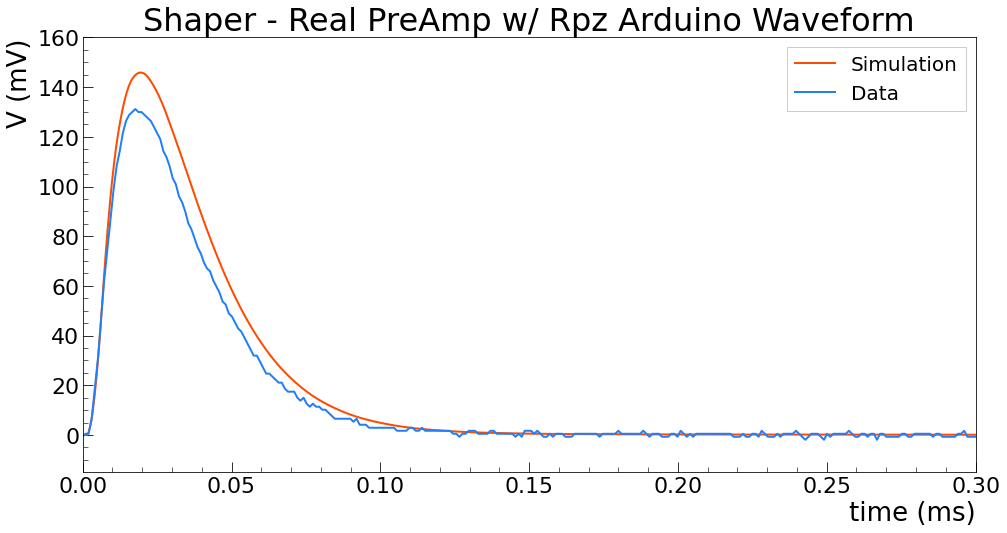

In [176]:
SA.arduino_preamp_shaper_rpz_plot(data, sim)

In [172]:
data_max = data[(data['V (V)'] == data['V (V)'].max())]

tau_shaper = data_max.at[354, 'time (ms)']

print(
    '\u03C4_sh = ' + format(tau_shaper * 1e3, '.2f') + ' \u03BCs'
)

τ_sh = 17.68 μs


In [174]:
vmax = data_max.at[354, 'V (V)']
print(
    'Vmax = ' + format(vmax, '.3f') + ' V'
)

Vmax = 0.131 V


In [185]:
importlib.reload(SA)

<module 'Shaper_Analysis_Code' from 'd:\\GitHub\\physics_laboratory_2020_2021\\CATENA ELETTRONICA\\Python\\Shaper_Analysis_Code.py'>